In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 22 12:13:57 2022

@author: Luigi Portinale
"""

import numpy as np
import matplotlib.pyplot as plt
from keras.api import layers, models, datasets, callbacks
model = models.Sequential()

#create a DNN with an input layer of 784 units
model.add(layers.Input(shape=(784,)))
# first hidden layer of 64 units
model.add(layers.Dense(64, activation="relu", name="layer1"))
#second hidden layer of 64 units
model.add(layers.Dense(64, activation="relu", name="layer2"))
#final layer softmax layer for 10 classes
model.add(layers.Dense(10, activation="softmax", name="final"))

# print summary
model.summary()

#print input/output_layer shape
##first dimension is batch/sample size; None if no committment on that
model.input_shape
model.output_shape

## load some data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
#each mage is 28x28 = 784 px
# normalize rgb by dividing by 255
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# compile model
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

#Training
callbacks=[
    callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]
print("Fit model on training data")
#NB training stops either after 50 epochs or for early stopping before 50th epoch
history = model.fit(
    x_train,
    y_train,
    batch_size=64, #mini-batch size --> 782 batches
    epochs=50,
    callbacks=callbacks,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

history.history

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final (Dense)                   │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Fit model on training data
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5770 - sparse_categorical_accuracy: 0.8351 - val_loss: 0.1764 - val_sparse_categorical_accuracy: 0.9494
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1607 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.1290 - val_sparse_categorical_accuracy: 0.9657
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1166 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.1292 - val_sparse_categorical_accuracy: 0.9607
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.1009 - val_sparse_categorical_accuracy: 0.9714
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0736 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.0994 - val_sparse_categorical_accuracy: 0.9737
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0638 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.1072 - val_sparse_catego

{'loss': [0.34231796860694885,
  0.15515290200710297,
  0.11294537782669067,
  0.09125398844480515,
  0.07616668939590454,
  0.06609614938497543],
 'sparse_categorical_accuracy': [0.9008599519729614,
  0.9533999562263489,
  0.9660999774932861,
  0.9724400043487549,
  0.9772999882698059,
  0.9797799587249756],
 'val_loss': [0.17639364302158356,
  0.1290387213230133,
  0.1292431503534317,
  0.10090412199497223,
  0.09937908500432968,
  0.1071673259139061],
 'val_sparse_categorical_accuracy': [0.9494000673294067,
  0.9657000303268433,
  0.9607000350952148,
  0.9714000225067139,
  0.9737000465393066,
  0.9706000685691833]}

Evaluate on test data
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9653
test loss, test acc: [0.10738389194011688, 0.9700000286102295]
Generate predictions for 10 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
predictions shape: (10, 10)
7
2
1
0
4
1
4
9
5
9


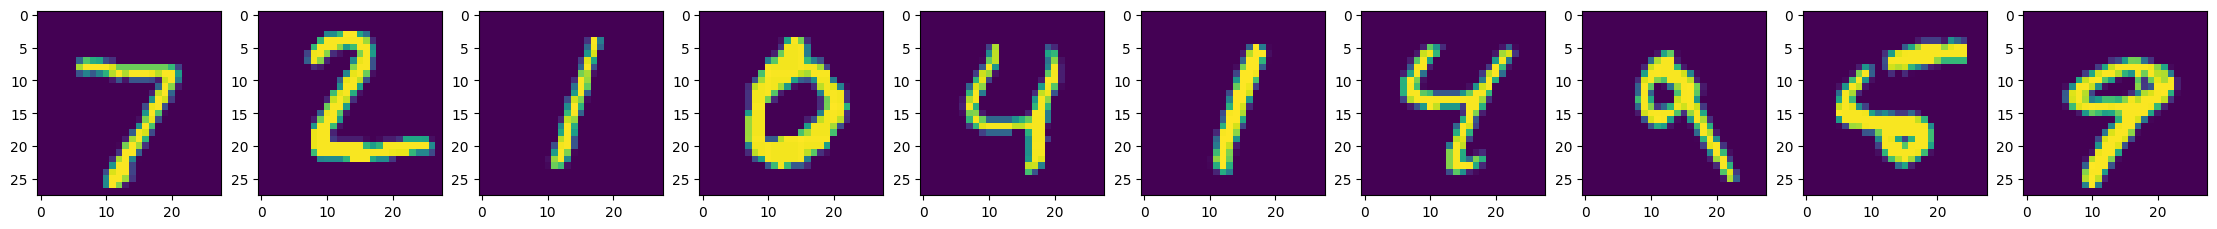

In [2]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 10 samples")
predictions = model.predict(x_test[:10])
print("predictions shape:", predictions.shape)

#Show the 3 predictions 
images=x_test[:10]

f, ax = plt.subplots(1,10)
f.set_size_inches(28, 28)

for i in range(10):
    #print class
    print(np.argmax(predictions[i]))

    #Visualize actual image
    ax[i].imshow(images[i].reshape(28, 28)*255)
plt.show()